# Week 9: Macro Facility Basics 

* Components of macro facility
* Ways to create macro variables
* Creating macro variables with the %LET statement
* Displaying macro variable values

[Jupyter Python Notebook Keyboard Shortcuts and Text Snippets for Beginners](http://maxmelnick.com/2016/04/19/python-beginner-tips-and-tricks.html)

### Macro Facility = Macro Processor + Macro Language
```
Macro processor does the actual macro processing
Macro language is the syntax used to communicate with the macro processor
```
```
More specifically, the macro facility does the following:
•	Dispalying system information
•	Symbolic substitution within the SAS code
•	Automated production of SAS code (automation for repetitive tasks)
•	Conditional construction of SAS code
•	Dynamic generation of SAS code (data-driven applications)
```

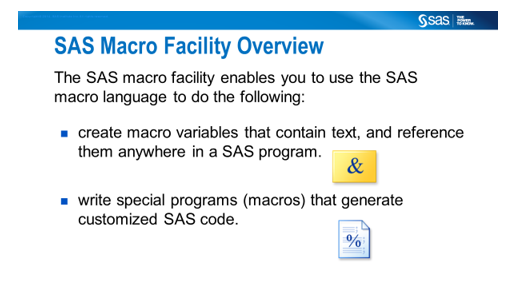

In [1]:
from IPython.display import Image
Image("C:/Data/Macro_Facility.png")

##### Macros vs. Macro variables
[Slaughter, SJ, abd LD. Delwiche.  SAS (R) Macro Programming for Beginner, SUGI](https://support.sas.com/resources/papers/proceedings/proceedings/sugi29/243-29.pdf)

 A macro varaiable is
 
* like a standard data variable cotaining a value which is always character
* stored in a memory area called global symbol table, not in a data set
* referenced with an ampershand (&)

A macro is a larger piece of a program, which

* starts with a %macro statement and ends with %mend statement
* can contain larger peiece of a code including DATA and PROC steps
* includes macro statements (e.g., %IF-%THEN-%ELSE, %DO-%END)
* often contains macro variables (but not always)


#### Advantage of code substitution using macro variables.

Instead of repeating the same piece(s) of text in your SAS program, you can create macro variables by:

* assigning that text to a macro variable  [%LET DS = CLASS;] once
* and then just referencing  it [&DS] at different parts of your SAS program without you having to type the same text over and over again.

The value of the macro variable could be:

* data set name
* data value
* variable name
* SAS statement 
* part of the SAS statement


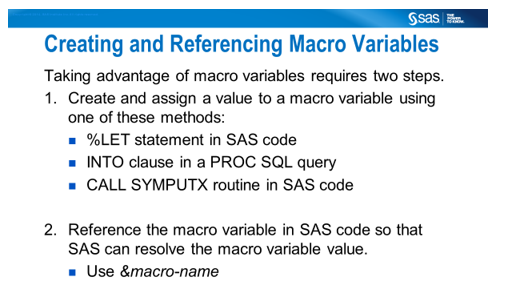

In [11]:
from IPython.display import Image
Image("C:/Data/Ways_to_create_macro_vars.png")

Macro variables

* Automatic macro variables (automatically created by the macro processor)
* User-defined macro variables (i.e., defined by the macro programmer)

Below are the two examples of user-defined macro variables.


In [1]:
options nocenter nodate nonumber symbolgen;
%let dsn = SASHELP.CLASS;
%let current_date = %sysfunc(date(), worddate.);
%let formatted_date = %sysfunc(putn(%sysfunc(today()), yymmdd10.));
%let HowMany = 5;

%put &current_date;
%put &=formatted_date;
%put &=HowMany;
%put _user_;

proc means data=&dsn; 
run;
title "Data Set: &dsn";
footnote "Created &current_date, &systime";
footnote2 "on the &sysscp, System using SAS Release &sysver";
footnote3 "File name: Ex1_Macrovars_&formatted_date..sas";
proc print data=&dsn (obs = &HowMany); 
run;

Variable,N,Mean,Std Dev,Minimum,Maximum
Age Height Weight,19 19 19,13.3157895 62.3368421 100.0263158,1.4926722 5.1270752 22.7739335,11.0000000 51.3000000 50.5000000,16.0000000 72.0000000 150.0000000
Obs,Name,Sex,Age,Height,Weight
1,Alfred,M,14,69.0,112.5
2,Alice,F,13,56.5,84.0
3,Barbara,F,13,65.3,98.0
4,Carol,F,14,62.8,102.5
5,Henry,M,14,63.5,102.5


In [2]:
%showLog


5                                                          The SAS System                               13:10 Friday, March 29, 2024

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
25         
26         options nocenter nodate nonumber symbolgen;
27         %let dsn = SASHELP.CLASS;
28         %let current_date = %sysfunc(date(), worddate.);
29         %let formatted_date = %sysfunc(putn(%sysfunc(today()), yymmdd10.));
30         %let HowMany = 5;
31         
32         %put &current_date;
SYMBOLGEN:  Macro variable CURRENT_DATE resolves to March 29, 2024
March 29, 2024
33         %put &=formatted_date;
SYMBOLGEN:  Macro variable FORMATTED_DATE resolves to 2024-03-29
FORMATTED_DATE=2024-03-29
34         %put &=HowMany;
SYMBOLGEN:  Macro variable HOWMANY resolves to 5
HOWMANY=5
35         %put _user_;
GLO

Note: In the above code, the %LET statement is used in open code (i.e., outside a macro definition) creates a macro variable (Global in scopre) that is available for use anywhere in your SAS code during the SAS session in which the variable was created.

A macro variable can store text up to 65k characters.

#### Code Explanation

The above code snippet includes both macro language and SAS language statements. The macro processor executes macro language statements and then generates SAS code before any SAS language statements are executed.

* %LET ia a macro statement.
* &dsn, &HowMany, and &name are macro variable references.

* When the %LET statement is executed, the text values of the macro variable is stored in the global symbol table.

* The macro trigger is passed to the macro processor to search the symbol table for the reference. The macro processor resolves the macro variable references (e.g., &dsn and &HowMany) substituting their respective values (sashelp.class, and 5, respectively), passing the resolved value to the Input Stack.

* %SYSFUNC enables you to invoke a SAS function  when constructing macro variables.  INPUT and PUT functions are not available with %SYSFUNC and %QSYSFUNC. You must use INPUTN, INPUTC, PUTN, and PUTC instead.
[See here more about %SYSFUNC.](https://support.sas.com/documentation/cdl/en/mcrolref/61885/HTML/default/viewer.htm#z3514sysfunc.htm)

* %PUT \_user_; is used to display the names and values all users-defined macro variables.

* SYMBOLGEN displays the results of resolving macro variable references in SAS log. This option is useful for debugging.



### Understandung the use of PUT vs. %PUT statement

In [2]:
*Ex3_putlog_PercentPut.sas;
options nodate nosource notes nonumber nocenter 
        leftmargin=0.5in symbolgen;
ods html close;
%LET Path=C:\users\pmuhuri\SASCourse\Week9;
LIBNAME perma "&Path";
data perma.stocks; 
 set sashelp.stocks END=last;
  count+1;
  if last then put
     @5 "Note: Number of observations=" count;
 run;
/*old way to display the macro-variable-value */  
 %put Note: Macro Variable Path = &Path; 

 /*new way to display the macro-variable-value */
 %put Note: Macro variable &=Path; 


The SAS System

NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
SYMBOLGEN:  Macro variable PATH resolves to C:\users\pmuhuri\SASCourse\Week9
NOTE: Libref PERMA was successfully assigned as follows: 
      Engine:        V9 
      Physical Name: C:\users\pmuhuri\SASCourse\Week9

    Note: Number of observations=699
NOTE: There were 699 observations read from the data set SASHELP.STOCKS.
NOTE: The data set PERMA.STOCKS has 699 observations and 9 variables.
NOTE: DATA statement used (Total process time):
      real time           0.02 seconds
      cpu time            0.01 seconds
      

SYMBOLGEN:  Macro variable PATH resolves to C:\users\pmuhuri\SASCourse\Week9
Note: Macro Variable Path = C:\users\pmuhuri\SASCourse\Week9
SYMBOLGEN:  Macro variable PATH resolves to C:\users\pmuhuri\SASCourse\Week9
Note: Macro variable PATH=C:\users\pmuhuri\SASCourse\Week9

The SAS System

E3969440A681A2408885998500000004


[SAS Documentation](https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=mcrolref&docsetTarget=p1jgr545j3yz29n1uic9qlvlrzo4.htm&locale=en)
```
Macro variables defined by macro programmers are called user-defined macro variables. Those defined by the macro processor are called automatic macro variables. You can define and use macro variables anywhere in SAS programs, except within data lines.

When a macro variable is defined, the macro processor adds it to one of the program's macro variable symbol tables. The variable is held in the global symbol table, which the macro processor creates at the beginning of a SAS session when the following occurs:

* a macro variable is defined in a statement that is outside a macro definition (called open code)

* the variable is created automatically by the macro processor (except SYSPBUFF)
```

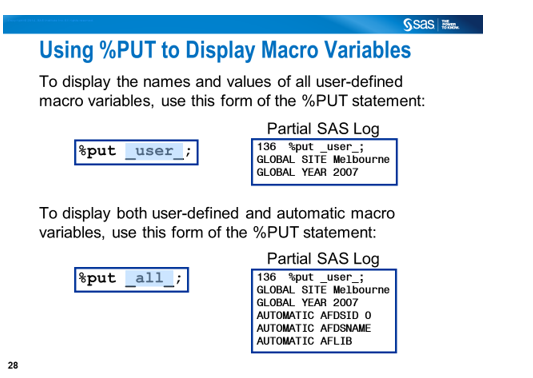

In [1]:
from IPython.display import Image
Image("C:/Data/Percent_put.png")

#### When macro variables are resolved, the leading and trailing blanks from their values are removed.

In [5]:
*Ex2_percent_let.sas;
options nonotes nodate nonumber nosource;
ods html close;
%LET CITY1 =   Washington DC ;
%put &=CITY1;
title;


The SAS System

96         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
96       ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
97         
98         *Ex2_percent_let.sas;
99         options nonotes nodate nonumber nosource;
SYMBOLGEN:  Macro variable CITY1 resolves to Washington DC
CITY1=Washington DC

The SAS System

E3969440A681A2408885998500000006


### Quotation marks are part of the macro variable value.

In [6]:
%LET CITY2 =  "Washington DC";
%put &=CITY2;


The SAS System

SYMBOLGEN:  Macro variable CITY2 resolves to "Washington DC"
CITY2="Washington DC"

The SAS System

E3969440A681A2408885998500000007


### When macro variables are resolved, embedded extra blanks from their values are not removed.

In [16]:
%LET CITY3=   Washington   DC;
%put &=CITY3;

### Mathematical expressions in macro variable values do not get evaluated.

In [24]:
%LET m_sum=2+2;
%put &=m_sum;

### With the %EVAL function, mathematical expressions get evaluated.

In [25]:
%LET msum_eval=%eval(2+2);
%put &=msum_eval;

### Only with the %SYSEVALF function, expressions with fractional numbers get evaluated.

In [3]:
%LET CALC_FRAC=%SYSEVALF(5.5/2);
%put &=CALC_FRAC;

#### %SYSFUNC is a function that executes SAS functions. PUTN assigns the value based on the value in the first argument and the format in the second argument.

In [3]:
%LET amount=%sysfunc(putn(5000000, dollar10.));
%put &=amount;


                                                           The SAS System

AMOUNT=$5,000,000

                                                           The SAS System

E3969440A681A2408885998500000005


In [2]:
options nodate nonumber nonotes nosource;
ods html close;
data _NULL_;
amount = put(5000000, dollar10.);
put amount=
run;


                                                           The SAS System

amount=$5,000,000 .

                                                           The SAS System

E3969440A681A2408885998500000004


In [13]:
%showLog

In [3]:
*Ex6_Join_macro_var_text.sas (Part 5);
*Display GLOBAL macro variables;
%put _GLOBAL_;

*Delete user-defined macro variables;
%symdel Path Libref /nowarn;

* and check all macro variables deleted;
%put _GLOBAL_;


The SAS System

NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
GLOBAL PATH C:\users\pmuhuri\SASCourse\Week9

The SAS System

E3969440A681A2408885998500000005


#### Find the total number of observations from a SAS data set using SAS macro statements

In [9]:
%let dsn=sashelp.class;
%let dsid    = %sysfunc(open(&dsn,i));
%let nobs    = %sysfunc(attrn(&dsid,nlobs));
%let dsclose = %sysfunc(close(&dsid));
%put &=nobs;


The SAS System

SYMBOLGEN:  Macro variable DSN resolves to sashelp.class
SYMBOLGEN:  Macro variable DSID resolves to 1
SYMBOLGEN:  Macro variable DSID resolves to 1
SYMBOLGEN:  Macro variable NOBS resolves to 19
NOBS=19

The SAS System

E3969440A681A2408885998500000010
